# Nonrelativistic sefl-interacting Boson Star. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [4]:
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit 
from scipy.integrate import solve_ivp, quad
from scipy.linalg import eig 

In [5]:
import metodosNR as metodos

In [6]:
import plt_conf as conf
conf.general() 

### System of equations 

#### Dimensionless Variables Eq. (1.54)
$$\Lambda:=\frac{|\lambda|M^{2}_{pl}}{2\pi m_0^2},\quad
     t:=\frac{2m_0}{\Lambda}t^{phys},\quad x:=\frac{2m_0}{\Lambda^{1/2}} x^{phys}, \\
     \mathcal{U}^{phys}:=\frac{\Lambda}{2}\mathcal{U},\quad \psi:=\left(\frac{\pi \Lambda^{2}}{2M_{\text{pl}}^{2}m_0}\right)^{1/2}\psi^{phys}. $$

#### Dimensionless System Eq. (1.56) 
$$\frac{d\sigma}{dr}=y,\quad\frac{dy}{dr}=-\frac{2y}{r}\pm\sigma^{3}-u\sigma,$$
$$ \frac{du}{dr}=x,\quad \frac{dx}{dr}=-\frac{2x}{r}-\sigma^{2}. $$

### Radial Profile $\sigma(r)$ with $n=0$ node and constant coupling $\lambda= -1,0,1$.  

In [7]:
Umax = 5; Umin = 0.1 #[U_min,U_max]
rmin = 0; rmax = 30 #[r_min, r_max] 
met = 'RK45' # 'DOP853'# Munerical method for solving PDE
Rtol = 1e-8 ; Atol = 1e-9

In [12]:
f0 = 1.0
nodos= 0

datos = []
for i in [0, 1, -1]:
    LambT = i 
    U0, rTemp, posNodos = metodos.Freq_solveG2(f0, Umax, Umin, LambT, rmax, rmin, nodos,met=met,
                                  Rtol=Rtol, Atol=Atol)
    #sigma_0, rTemp, Lambda, nodos, posNodos, met, Rtol, Atol, U0 = datos
    datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])


Finding a profile with  0 nodes
Maxima precisión alcanzada u0 0.9185797720305164 radio 22.310866190947152
Finding a profile with  0 nodes
Maxima precisión alcanzada u0 1.4796444062459853 radio 19.918486852489806
Finding a profile with  0 nodes
Maxima precisión alcanzada u0 0.5667978723491142 radio 24.26734152610944


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_26976/1703071679.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))


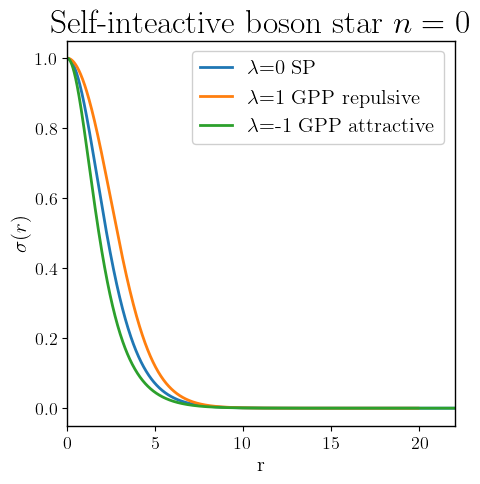

In [15]:
Nombres = ['SP','GPP repulsive','GPP attractive']
fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))

for i, dataPerf in enumerate(datos):
    # Resolviendo
    #Energia, Masa, sol2.t, sol2.y[0], sol2.y[1], sol2.y[2], sol2.y[3], nodos, posNodos, Lambda
    en, Mas, rD, sD, dsD, uD, duD, EF, nodos, posNodos, LamV= metodos.profilesFromSolut(dataPerf, inf=False)
    
    plt.plot(rD,sD, label=r'$\lambda$={} {}'.format(LamV,Nombres[i]))
    
    
plt.legend()
plt.xlim(0, 22)
plt.xlabel(r'$r$')
plt.ylabel(r'$\sigma(r)$')
plt.title("Self-inteactive boson star $n=0$")
plt.show()
#plt.savefig("figure.png") # save as png

### Radial Profile $\sigma(r)$ with $n=1$ node and constant coupling $\lambda= -1,0-1$

In [10]:
f0 = 1.
nodos = 1

# en, Mas, rD, sD, dsD, uD, duD, cer0, LamV  = ru.profiles2(nodos, Lam, f0, umin=Umin, umax=Umax, met='DOP853')
datos = []
for i in [0, 1, -1]:
    LambT = i 
    U0, rTemp, posNodos = metodos.Freq_solveG2(f0, Umax, Umin, LambT, rmax, rmin, nodos,met=met,
                                  Rtol=Rtol, Atol=Atol)

    datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
    

Found 1.2099590016613337
Maxima precisión alcanzada u0 1.6676158743253526 radio 27.521032153353083
Found 0.917405620871


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_1896/3331881885.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))


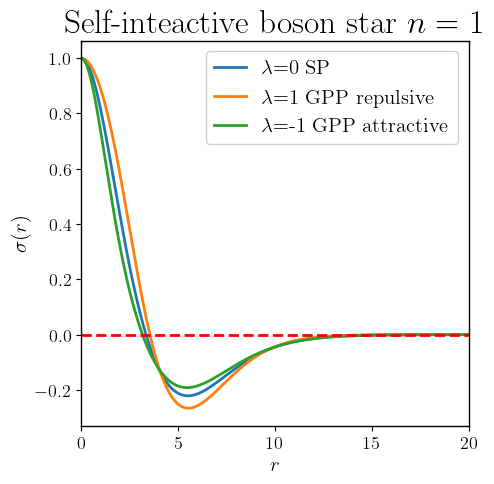

In [12]:
Nombres = ['SP','GPP repulsive','GPP attractive']

fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))

for i, dataPerf in enumerate(datos):
    # Resolviendo
    # sigma_0, rTemp, Lambda, nodos, posNodos, met, Rtol, Atol, U0 = datos
    en, Mas, rD, sD, dsD, uD, duD, EF, nodos, posNodos, LamV = metodos.profilesFromSolut(dataPerf, inf=False)
    
    plt.plot(rD,sD, label=r'$\lambda$={} {}'.format(LamV,Nombres[i]))
    
    
plt.legend()
plt.xlim(0, 20)
plt.xlabel(r'$r$')
plt.ylabel(r'$\sigma(r)$')
plt.title("Self-inteactive boson star $n=1$")
plt.axhline(y=0, color='r', linestyle='--', label='Línea punteada en y=0')
plt.savefig("self_interactive_boson_n1.png") # save as png

### $M_{99}$ vs $R_{99}$ non-reativistic selfinteractive boson star with $n=0$ nodes for $\lambda= 0,1,-1$

In [6]:
Umax = 5; Umin = 0.0
rmin = 0; rmax = 20 #1e03
met = 'RK45' # 'DOP853'
Rtol = 1e-8 ; Atol = 1e-9

nodos = 0


Lambda = [1,0,-1]
datos = []
f0 = list(np.linspace(0,2,10))

for j in Lambda: 

    for i in f0:
                print('Lambda', j, 'Sigma_0', i, 'nodos', nodos)

                U0, rTemp, posNodos = metodos.Freq_solveG2(i, Umax, Umin, j, rmax, rmin, nodos,met=met,
                                      Rtol=Rtol, Atol=Atol)

                #datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
                datos.append([i, rTemp, j, nodos, posNodos, met, Rtol, Atol, U0])
                
                           
f0 = list(np.linspace(3,4,20))

for j in Lambda: 

    for i in f0:
                print('Lambda', j, 'Sigma_0', i, 'nodos', nodos)

                U0, rTemp, posNodos = metodos.Freq_solveG2(i, Umax, Umin, j, rmax, rmin, nodos,met=met,
                                      Rtol=Rtol, Atol=Atol)

                #datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
                datos.append([i, rTemp, j, nodos, posNodos, met, Rtol, Atol, U0])
            
            
#np.save('DatosM99vsR99Shoothing.npy', datos, allow_pickle=True)
#DatosM99vsR99Shoothing = np.load('DatosM99vsR99Shoothing.npy', allow_pickle=True)

Lambda 1 Sigma_0 0.0 nodos 0
Maxima precisión alcanzada u0 1.7763568394002505e-14 radio 11.111110999999998
Lambda 1 Sigma_0 0.2222222222222222 nodos 0
Found 0.22724151611328125
Lambda 1 Sigma_0 0.4444444444444444 nodos 0
Found 0.5058369040489197
Lambda 1 Sigma_0 0.6666666666666666 nodos 0
Found 0.843754692323273
Lambda 1 Sigma_0 0.8888888888888888 nodos 0
Found 0.625
Lambda 1 Sigma_0 1.1111111111111112 nodos 0
Maxima precisión alcanzada u0 1.7298671363843177 radio 19.219554817934956
Lambda 1 Sigma_0 1.3333333333333333 nodos 0
Found 1.25
Lambda 1 Sigma_0 1.5555555555555554 nodos 0
Maxima precisión alcanzada u0 2.9436915975344213 radio 15.295628527872156
Lambda 1 Sigma_0 1.7777777777777777 nodos 0
Found 2.5
Lambda 1 Sigma_0 2.0 nodos 0
Found 2.5
Lambda 0 Sigma_0 0.0 nodos 0
Maxima precisión alcanzada u0 1.7763568394002505e-14 radio 11.111110999999998
Lambda 0 Sigma_0 0.2222222222222222 nodos 0
Found 0.20412445068359375
Lambda 0 Sigma_0 0.4444444444444444 nodos 0
Found 0.40825769305229187

/Users/edgarpreciado/Downloads/Boson_star_Chapter/Configuraciones_Bosones/Non_relativistic_boson_star/metodosNR.py:371: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(sol_.t, sol_.y[0])


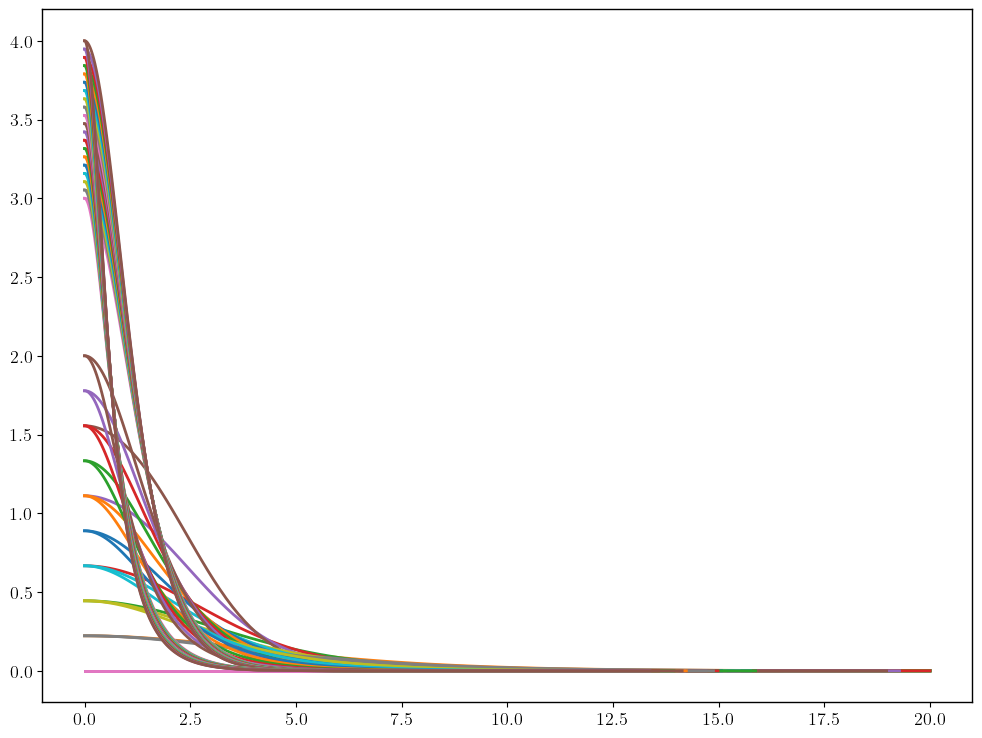

In [7]:
datos_filtro_1, datos_filtro_0, datos_filtro_N1 = metodos.Filtracion(datos, inf=True)

In [9]:
M99vsR99L1 = metodos.M99vsR99(datos_filtro_1)
M99vsR99L0 = metodos.M99vsR99(datos_filtro_0)
M99vsR99LN1 = metodos.M99vsR99(datos_filtro_N1)

Mas 0.0 Mtotal nan M99 0.0 Lambda 1
0
Mas 1.864892971785023 Mtotal 1.882362469726425 M99 1.8635428711871784 Lambda 1
1
Mas 3.0119051992923542 Mtotal 3.0119349667147004 M99 2.981724656926101 Lambda 1
2
Mas 4.223984858140262 Mtotal 4.223990350939599 M99 4.181549662375912 Lambda 1
3
Mas 7.154484966624337 Mtotal 7.154494125149153 M99 7.082924440798762 Lambda 1
4
Mas 11.018695562598799 Mtotal 11.018704156713616 M99 10.908921042706906 Lambda 1
5
Mas 0.0 Mtotal nan M99 0.0 Lambda 0
0
Mas 1.6353677781875362 Mtotal 1.646030924689323 M99 1.6295730121947292 Lambda 0
1
Mas 2.312168814960138 Mtotal 2.312209675546611 M99 2.2890786377696335 Lambda 0
2
Mas 2.8318193195167596 Mtotal 2.8318250012887796 M99 2.8034796135209463 Lambda 0
3
Mas 3.269903278647667 Mtotal 3.2699112251443707 M99 3.2372024661662406 Lambda 0
4
Mas 3.655863003176781 Mtotal 3.655873695186798 M99 3.619405280681597 Lambda 0
5
Mas 4.004797271540707 Mtotal 4.004811728562509 M99 3.9644738408678672 Lambda 0
6
Mas 4.325675444076014 Mtotal 

In [10]:
np.save('M99vsR99L1.npy',M99vsR99L1, allow_pickle=True )
np.save('M99vsR99L0.npy',M99vsR99L0, allow_pickle=True )
np.save('M99vsR99LN1.npy',M99vsR99LN1, allow_pickle=True )

In [7]:
# Sig0R99M99EnergyT.append([sDnew[0],R99, M99])
M99vsR99L11 = np.load('M99vsR99L1.npy', allow_pickle=True)
M99vsR99L00 = np.load('M99vsR99L0.npy', allow_pickle=True )
M99vsR99LN11 = np.load('M99vsR99LN1.npy', allow_pickle=True )

In [8]:
RL0 = []
ML0 = []
RL1 = []
ML1 = []
RL_1 = []
ML_1 = []

for i, sublista in enumerate(M99vsR99L00):       
    
                RL0.append(sublista[1])
                ML0.append(4*(np.pi)*sublista[2])
            
for i, sublista in enumerate(M99vsR99L11):
        
                RL1.append(sublista[1])
                ML1.append(4*(np.pi)*sublista[2])
                
for i, sublista in enumerate(M99vsR99LN11):
        
                RL_1.append(sublista[1])
                ML_1.append(4*(np.pi)*sublista[2])
  

In [25]:
for k,i in enumerate(RL0): 
    print(k, i, ML0[k])

0 0.0 0.0
1 13.746873436718358 20.477818414396605
2 8.604302151075537 28.765410527625647
3 7.023511755877939 35.22956383330463
4 6.08304152076038 40.67988594356249
5 5.44272136068034 45.48278816061364
6 4.96248124062031 49.81904757527761
7 4.6024583011398414 53.818352253449575
8 4.297463354919215 57.52593911916222
9 4.053407077099674 61.01753470573212
10 3.312121767317614 74.7354710429048
11 3.2830296749766488 75.3874790893045
12 3.2566108930649813 76.03743397760695
13 3.224850621562579 76.67048694418956
14 3.1987627410705852 77.30767113352017
15 3.175813207480374 77.94458277509425
16 3.1509040355323257 78.57145562225055
17 3.123746473783645 79.18759253183663
18 3.101912456500047 79.8086509780278
19 3.0751891246842384 80.41354969140296
20 3.051964690315296 81.02006654619571
21 3.031288396807063 81.6264566540682
22 3.0102475861878606 82.22664636257703
23 2.9867819777300872 82.81615550342299
24 2.969407070936584 83.41404591105987
25 2.9491473960423074 84.00041826976269
26 2.9279911022098

/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_6072/2903015634.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))


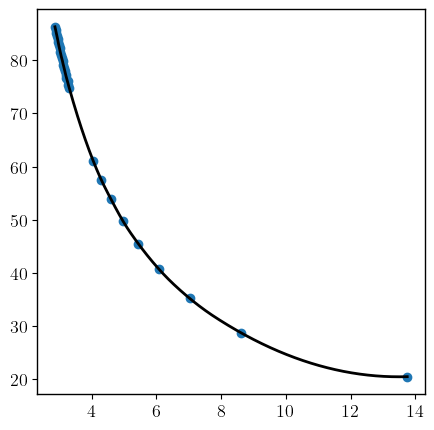

In [27]:
fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))
RL0.pop(0)
ML0.pop(0)
#RL_1.pop(0)
#ML_1.pop(0)
#RL1.pop(0)
#ML1.pop(0)
plt.scatter(RL0, ML0)
#plt.scatter(RL1, ML1)
#plt.scatter(RL_1, ML_1)


NRBstarML0   = interp1d(RL0, ML0, kind='quadratic')
NRRadioL0 = np.linspace(RL0[0],RL0[-1],1000)
plt.plot(NRRadioL0,NRBstarML0(NRRadioL0), color = 'black')

plt.show()


In [9]:
datos_ = []
Umax = 5; Umin = 0.1
rmin = 0; rmax = 30 #1e03
Rtol = 1e-8 ; Atol = 1e-9

for i in [0, 1, -1]:
    LambT = i 
    # Freq_solveG2(sigma_0, u_max, u_min, Lambda, rmax_, rmin_, nodos, df0=0, du0=0,met='RK45', Rtol=1e-09, Atol=1e-10):
    U0, rTemp, posNodos = metodos.Freq_solveG2(1.0, 5, 0.0, LambT, 30, 0, 0,met='RK45',
                                  Rtol=Rtol, Atol=Atol)
    # sigma_0, rTemp, Lambda, nodos, posNodos, met, Rtol, Atol, U0 = datos
    datos_.append([1.0, rTemp, LambT, 1, posNodos, 'RK45', Rtol, Atol, U0])

Maxima precisión alcanzada u0 0.9185797719559297 radio 22.805979499499088
Maxima precisión alcanzada u0 1.479644406342917 radio 19.944546388617393
Maxima precisión alcanzada u0 0.5667978721540301 radio 24.285325355361092


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_6072/236479914.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows= 1, ncols = 2, figsize = (10,5))


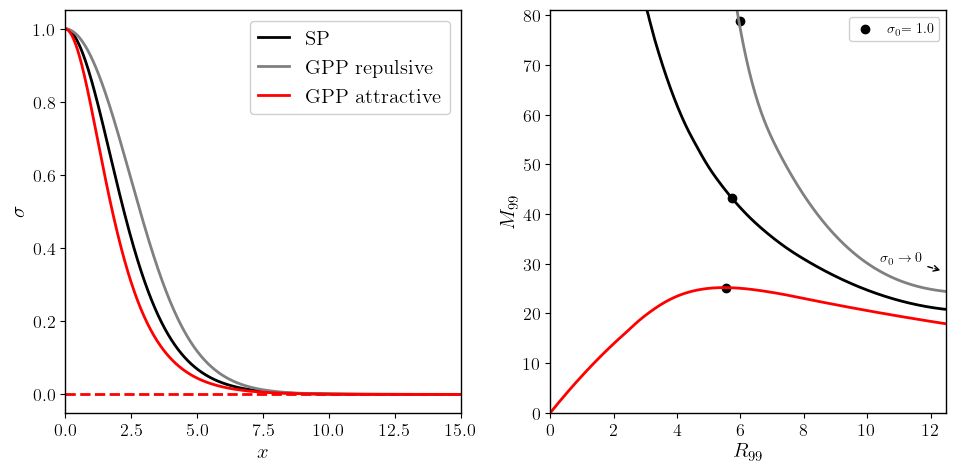

In [76]:

fig, axes = plt.subplots(nrows= 1, ncols = 2, figsize = (10,5))

ax0 = axes[1]
ax1 = axes[0]


NRBstarML0   = interp1d(RL0, ML0, kind='quadratic')
NRRadioL0 = np.linspace(RL0[0],RL0[-1],1000)
plt.plot(NRRadioL0,NRBstarML0(NRRadioL0), color = 'black')

NRBstarML1   = interp1d(RL1, ML1, kind='cubic')
NRRadioL1 = np.linspace(RL1[4],RL1[0],1000)
plt.plot(NRRadioL1,NRBstarML1(NRRadioL1), color = 'gray')

NRBstarML_1   = interp1d(RL_1, ML_1, kind='quadratic')
NRRadioL_1 = np.linspace(RL_1[0],RL_1[1],1000)
plt.plot(NRRadioL_1,NRBstarML_1(NRRadioL_1),color = 'red')


met = 'DOP853' # 'RK45' # 'DOP853'
Rtol = 1e-13 
Atol = 1e-15
colores = ['black', 'gray','red']
Nombres = ['SP','GPP repulsive','GPP attractive']
for i, dataPerf in enumerate(datos_):
    # Resolviendo
    #Energia, Masa, sol2.t, sol2.y[0], sol2.y[1], sol2.y[2], sol2.y[3], sol2.y[4], nodos, posNodos, Lambda
    en, Mas, rD, sD, dsD, uD, duD, EF, nodos, posNodos, LamV = metodos.profilesFromSolut(dataPerf, inf=False)
    
    ax1.plot(rD,sD,label=r'{}'.format(Nombres[i]), color = colores[i])
    ax1.annotate(r'$\sigma_{0}\to 0$', xy = (15,4*(np.pi)*1.61159143), xytext=(13.5, 4*(np.pi)*1.91159143),
            arrowprops={'arrowstyle': '->', 'ls': 'dashed'}, va = 'center')

    

ax0.set_xlim(0, 12.5)
ax0.set_ylim(0, 81)
# [sigma_0 = 1.00005000e+00, R99 = 5.53164128e+00, M99 = 2.00451857e+00]
plt.scatter(5.53164128e+00, 4*(np.pi)*2.00451857e+00, label = r'$\sigma_{0}$= 1.0', color = 'black')
# [sigma_0 = 1.00005000e+00, R99 =  5.73226767e+00, M99 =  3.43352809e+00]
plt.scatter(5.73226767e+00, 4*(np.pi)*3.43352809e+00, color = 'black')
##[sigma_0 = 1.00005000e+00, R99=5.98059949e+00, M99=6.28137321e+00]
plt.scatter(5.98059949e+00, 4*(np.pi)*6.28137321e+00, color = 'black') 
ax0.annotate(r'$\sigma_{0}\to 0$', xy = (12.4, 28.5), xytext=(10.4, 31), arrowprops={'arrowstyle': '->', 'ls': 'dashed'}, va = 'center', fontsize = 10)
ax1.set_xlim(0, 15)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\sigma$')
#ax1.set_title("Self-inteactive boson star $n=0$")
ax0.set_ylabel(r'$M_{99}$')
ax0.set_xlabel(r'$R_{99}$')
ax1.axhline(y=0, color='r', linestyle='--')
ax0.legend(fontsize=10)
ax1.legend()
fig.tight_layout()
plt.savefig("boson_n0_M99R99x.pdf") 
plt.show()

### Total mass $M_{tot}$ for a non-reativistic selfinteractive boson star with $n=1,2$ nodes for $\lambda= 0,1,-1$

In [6]:
Umax = 5; Umin = 0.1
nodos = 0
rmin = 0; rmax = 30 #1e03
met = 'RK45' # 'DOP853'
Rtol = 1e-8; Atol = 1e-9

In [7]:
nodos=[1,2]
Lambda = [0,1,-1]
datos = []
f0 = 1.0

for k in nodos: 
    for j in Lambda: 

                    U0, rTemp, posNodos = metodos.Freq_solveG2(f0, Umax, Umin, j, rmax, rmin, k, met=met,
                                          Rtol=Rtol, Atol=Atol)

                    #datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
                    datos.append([f0, rTemp, j, k, posNodos, met, Rtol, Atol, U0])

#np.save('n1n2masa.npy', datos, allow_pickle=True)
#n1n2masa = np.load('n1n2masa.npy', allow_pickle=True)

Found 1.2099590016613337
Maxima precisión alcanzada u0 1.6676158743253526 radio 27.521032153353083
Found 0.917405620871
Found 1.343700647284277
Found 1.7747065575101262
Found 1.0598489619791511


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_4011/1188455739.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows= 1, ncols = 3, figsize = (15,5) )


7.713951176379969 1 0
10.640284430973747 1 1
5.971264854002125 1 -1
11.935472657537426 2 0
15.152707322133146 2 1
9.882767150046101 2 -1


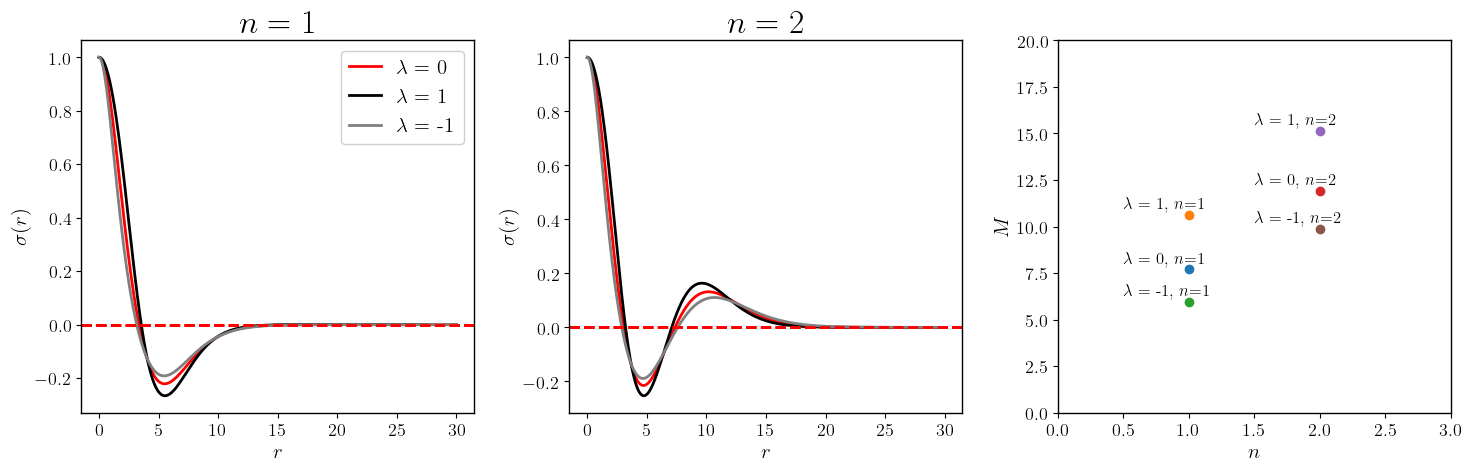

In [11]:
#radSigmMasa, Sig0R99M99EnergyT = [], []
colores = ['red', 'black', 'gray', 'red', 'black', 'gray']
Mass =[]
nodos = []
fig, axes = plt.subplots(nrows= 1, ncols = 3, figsize = (15,5) )
for i,dataPerf in enumerate(datos):
    # Resolviendo Numericamente
    en, Mas, rD, sD, dsD, uD, duD, EF, nodo, posNodos, LamV = metodos.profilesFromSolut(dataPerf, inf=False)
    print(Mas,nodo,LamV)
    if  nodo == 1: 
        ax = axes[0]
        ax.plot(rD, sD, label = r'$\lambda$ = {}'.format(LamV), color = r'{}'.format(colores[i]))
        ax.set_title(r'$n=1$')
        ax.set_ylabel(r'$\sigma(r)$')
        ax.set_xlabel(r'$r$')
        ax.axhline(y=0, color='r', linestyle='--')
        ax.legend()
        
        
        ax1 = axes[2]
        ax1.scatter(nodo, Mas)
        ax1.set_xlim(0,3)
        ax1.set_ylim(0,20)
        ax1.annotate(r'$\lambda$ = {}, $n$={}'.format(LamV,nodo), xy = (nodo-0.5, Mas+0.3), fontsize = 12, ha= 'left')
        ax1.set_ylabel(r'$M_{total}$')
        ax1.set_xlabel(r'$n$')


    
    elif nodo == 2: 
        ax = axes[1]
        ax.plot(rD, sD, color = r'{}'.format(colores[i]))
        ax.set_title(r'$n=2$')
        ax.set_ylabel(r'$\sigma(r)$')
        ax.set_xlabel(r'$r$')
        ax.axhline(y=0, color='r', linestyle='--')
        
        ax1 = axes[2]
        ax1.scatter(nodo, Mas)
        ax1.set_xlim(0,3)
        ax1.annotate(r'$\lambda$ = {}, $n$={}'.format(LamV,nodo), xy = (nodo-0.5, Mas+0.3), fontsize = 12, ha= 'left')
        ax1.set_ylabel(r'$M$')
        ax1.set_xlabel(r'$n$')
        

fig.tight_layout()
#plt.savefig('n12Total_Mass.pdf')
plt.show()
    

### $M_{99}$ vs $R_{99}$ non-reativistic selfinteractive boson star with $n=1$ nodes for $\lambda= 0,1,-1$

In [6]:
Lambda = [-1,0,1]
datos = []
rmin = 0
rmax = 30 #1e03
met = 'RK45' # 'DOP853'
Rtol = 1e-8 ## 1e-13
Atol = 1e-9  ## 1e-15
nodos = 1


Umax = 5; Umin = 0.0
f0 = list(np.linspace(0,4,35))

for k,j in enumerate(Lambda): 
    for i in f0:
                metodos.progressbar(i, len(f0)-1, 100, '■')

                U0, rTemp, posNodos = metodos.Freq_solveG2(i, Umax, Umin, j, rmax, rmin, nodos ,met=met,
                                      Rtol=Rtol, Atol=Atol)

                #datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
                datos.append([i, rTemp, j, nodos, posNodos, met, Rtol, Atol, U0])    

                
#np.save('DatosM99vsR99ShoothingN1.npy', datos, allow_pickle=True)
#DatosM99vsR99ShoothingN1 = np.load('DatosM99vsR99ShoothingN1.npy', allow_pickle=True) 

Maxima precisión alcanzada u0 1.7763568394002505e-14 radio 11.111110999999998                                  ]0%
Found 0.13671875                                                                                               ]0%
Found 0.2655792236328125                                                                                       ]0%
Found 0.38520336151123047                                                                                      ]1%
Found 0.4969047009944916                                                                                       ]1%
Found 0.6013339292258024                                                                                       ]1%
Found 0.6990617400151677                                                                                       ]2%
Found 0.790613589269924                                                                                        ]2%
Found 0.876471868994031                                                         

In [32]:
np.save('DatosM99vsR99ShoothingN1.npy', datos, allow_pickle=True)

/Users/edgarpreciado/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [7]:
DatosM99vsR99ShoothingN1 = np.load('DatosM99vsR99ShoothingN1.npy', allow_pickle=True) 

array([0.0, 11.111110999999998, -1, 1,
       array([0.0000000e+00, 1.0000000e-06, 1.1000000e-05, 1.1100000e-04,
              1.1110000e-03, 1.1111000e-02, 1.1111100e-01, 1.1111110e+00,
              1.1111111e+01])                                            ,
       'RK45', 1e-08, 1e-09, 1.7763568394002505e-14], dtype=object)

/Users/edgarpreciado/Downloads/Boson_star_Chapter/Configuraciones_Bosones/Non_relativistic_boson_star/metodosNR.py:400: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(sol_.t, sol_.y[0])


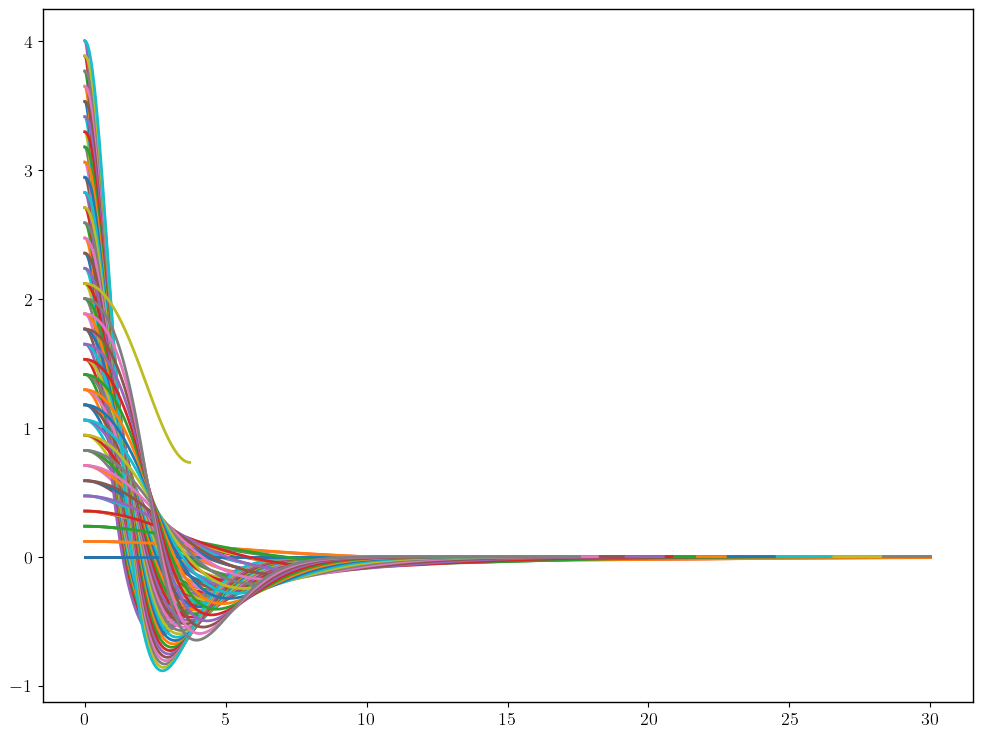

In [8]:
datos_filtro_L1, datos_filtro_L0, datos_filtro_LN1 = metodos.Filtracion(DatosM99vsR99ShoothingN1, inf=True)

In [10]:
M99vsR99L1n1 = metodos.M99vsR99(datos_filtro_L1) 
M99vsR99L0n1 = metodos.M99vsR99(datos_filtro_L0)
M99vsR99LN1n1 = metodos.M99vsR99(datos_filtro_LN1)

np.save('M99vsR99L1n1.npy',M99vsR99L1n1, allow_pickle=True )
np.save('M99vsR99L0n1.npy',M99vsR99L0n1, allow_pickle=True )
np.save('M99vsR99LN1n1.npy',M99vsR99LN1n1, allow_pickle=True )

/Users/edgarpreciado/Downloads/Boson_star_Chapter/Configuraciones_Bosones/Non_relativistic_boson_star/metodosNR.py:174: RuntimeWarning: invalid value encountered in double_scalars
  k = np.real(np.log(np.abs(yr1*r1/(yr2*(r2)))))
/Users/edgarpreciado/Downloads/Boson_star_Chapter/Configuraciones_Bosones/Non_relativistic_boson_star/metodosNR.py:225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  masa = quad(fprof, rDnew[0], rDnew[-1])[0]
/Users/edgarpreciado/Downloads/Boson_star_Chapter/Configuraciones_Bosones/Non_relativistic_boson_star/metodosNR.py:269: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably g

Mas 0.0 Mtotal nan M99 0.0 Lambda 1
0
Mas 3.074346912280633 Mtotal 8.497791682038683 M99 8.346945820662071 Lambda 1
1
Mas 4.011248095663092 Mtotal 4.065701066336685 M99 4.025738392531197 Lambda 1
2
Mas 5.095564300270064 Mtotal 5.0966001707110475 M99 5.0455741145730615 Lambda 1
3
Mas 6.10705633357158 Mtotal 6.107066662534082 M99 6.046149356406034 Lambda 1
4
Mas 7.093311179706998 Mtotal 7.0932944733288865 M99 7.022529255489712 Lambda 1
5
Mas 8.079520210839851 Mtotal 8.079490010206884 M99 7.998103207767017 Lambda 1
6
Mas 9.081832675424302 Mtotal 9.081793983054851 M99 8.991229757550489 Lambda 1
7
Mas 10.111909720924869 Mtotal 10.11185974462053 M99 10.010349468865046 Lambda 1
8
Mas 11.178891020528756 Mtotal 11.178833444723676 M99 11.0675749176395 Lambda 1
9
Mas 12.290357254594433 Mtotal 12.290297578052789 M99 12.166891058665055 Lambda 1
10
Mas 13.452835924810334 Mtotal 13.452768632503396 M99 13.318287629779096 Lambda 1
11
Mas 14.672077187838138 Mtotal 14.672004167378834 M99 14.5256548731815

/Users/edgarpreciado/Downloads/Boson_star_Chapter/Configuraciones_Bosones/Non_relativistic_boson_star/metodosNR.py:225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  masa = quad(fprof, rDnew[0], rDnew[-1])[0]


Mas 20.99418517300264 Mtotal 553.4373400982928 M99 553.4373400982928 Lambda 1
18
Mas 0.0 Mtotal nan M99 0.0 Lambda 0
0
Mas 2.8405035709077384 Mtotal 7.087953148411875 M99 6.972900259479884 Lambda 0
1
Mas 3.7437431405012367 Mtotal 3.8198668052206632 M99 3.7815606222544385 Lambda 0
2
Mas 4.582635035495176 Mtotal 4.584118950169562 M99 4.538112632686184 Lambda 0
3
Mas 5.291722567120287 Mtotal 5.291767628692606 M99 5.238597819168926 Lambda 0
4
Mas 5.916330333829318 Mtotal 5.91631871945122 M99 5.8575259825918025 Lambda 0
5
Mas 6.481015333301581 Mtotal 6.480996858612723 M99 6.416235147920349 Lambda 0
6
Mas 7.000296632066574 Mtotal 7.000272165256427 M99 6.930497025630085 Lambda 0
7
Mas 7.483631879783078 Mtotal 7.483603598439585 M99 7.40869528406495 Lambda 0
8
Mas 7.937590274943673 Mtotal 7.937554725192728 M99 7.857875204670188 Lambda 0
9
Mas 8.366954812031153 Mtotal 8.366908507906627 M99 8.2834994767938 Lambda 0
10
Mas 8.7753362184276 Mtotal 8.775298355879684 M99 8.687624114666736 Lambda 0
11


In [48]:
M99vsR99L1n1_ = np.load('M99vsR99L1n1.npy', allow_pickle=True )
M99vsR99L0n1_ =np.load('M99vsR99L0n1.npy', allow_pickle=True )
M99vsR99LN1n1_ = np.load('M99vsR99LN1n1.npy', allow_pickle=True )

In [49]:
RL0n1 = []
ML0n1 = []
RL1n1 = []
ML1n1 = []
RL_1n1 = []
ML_1n1 = []

for i, sublista in enumerate(M99vsR99L1n1_):
        
                RL1n1.append(sublista[1])
                ML1n1.append(4*(np.pi)*sublista[2])

for i, sublista in enumerate(M99vsR99L0n1_):
                
                RL0n1.append(sublista[1])
                ML0n1.append(4*(np.pi)*sublista[2])

for i, sublista in enumerate(M99vsR99LN1n1_):
                 
                RL_1n1.append(sublista[1])
                ML_1n1.append(4*(np.pi)*sublista[2])
                

In [65]:
for k,i in enumerate(RL0n1): 
     print(k,i)

0 99.02737082827127
1 60.92153389890494
2 18.3991995997999
3 15.892946473236618
4 14.22711355677839
5 12.981490745372687
6 12.021010505252626
7 11.240620310155078
8 10.595297648824413
9 10.057320797296612
10 9.587566803602023
11 9.179888026326834
12 8.822423573611948
13 8.495670088567683
14 8.208399067306704
15 7.949811103137507
16 7.715931124311525
17 7.495103411373947
18 7.293999285976871
19 7.115088415649048
20 6.938610498945531
21 6.7811605206725245
22 6.631772100409042
23 6.493156590930911
24 6.361308315937565
25 6.236682382129609
26 6.118757338593707
27 6.007916288825618
28 5.905968764725961
29 5.807896549356216
30 5.70854359595397
31 5.617810787708616
32 5.535641221676587
33 5.4555743705139434


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_6072/4132438384.py:11: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.scatter(RL0n1, ML0n1)


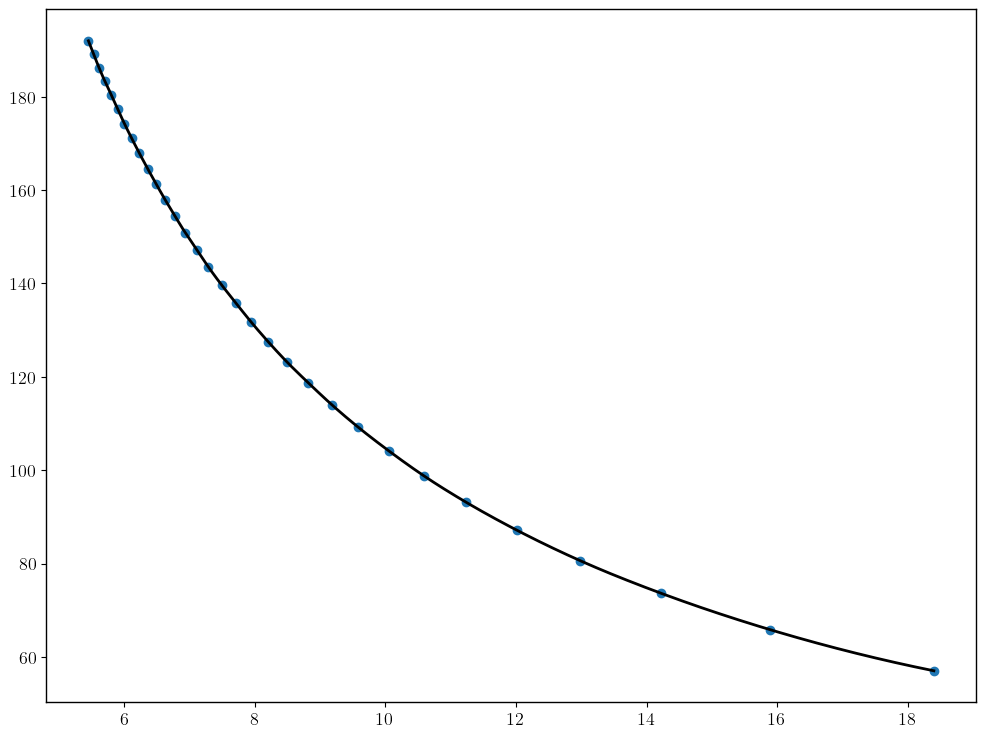

In [67]:
    
#for i in range(4):
#RL1n1.pop(0)
#ML1n1.pop(0)
#RL0n1.pop(0)
#ML0n1.pop(0)
#RL_1n1.pop(1)
#ML_1n1.pop(1)
#print(RL1n1, ML1n1)
#plt.xlim(0,21)
#lt.scatter(RL1n1, ML1n1)
plt.scatter(RL0n1, ML0n1)
#plt.scatter(RL1n1, ML1n1)

NRBstarML0n1   = interp1d(RL0n1, ML0n1, kind='quadratic')
NRRadioL0n1 = np.linspace(RL0n1[0],RL0n1[-1],1000)
plt.plot(NRRadioL0n1,NRBstarML0n1(NRRadioL0n1), color = 'black')


In [56]:
#Valores de Sigma_0=1
M99vsR99L1n1_simaga_0_1 = [1.05271053e+00, 1.00497823e+01, 1.10101812e+01]
M99vsR99L0n1_sigma_0_1 = [1.05271053e+00, 1.06346082e+01, 7.83593097e+00]
M99vsR99LN1n1_sigma_0_1 = [1.05271053e+00, 1.11229432e+01, 5.99384772e+00]

In [58]:

met = 'RK45' # 'DOP853'
Rtol = 1e-8 ## 1e-13
Atol = 1e-9  ## 1e-15

datos_ = []
for i in [0, 1, -1]:
    LambT = i 
    U0, rTemp, posNodos = metodos.Freq_solveG2(1.0, 5, 0.0, LambT, 30, 0, 1,met=met,
                                  Rtol=Rtol, Atol=Atol)
    # sigma_0, rTemp, Lambda, nodos, posNodos, met, Rtol, Atol, U0 = datos
    datos_.append([1.0, rTemp, LambT, 1, posNodos, met, Rtol, Atol, U0])

Found 1.2099590016613249
Maxima precisión alcanzada u0 1.6676158743253389 radio 26.89699923374562
Found 0.91740562087125


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_6072/3319905691.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows= 1, ncols = 2, figsize = (10,5) )


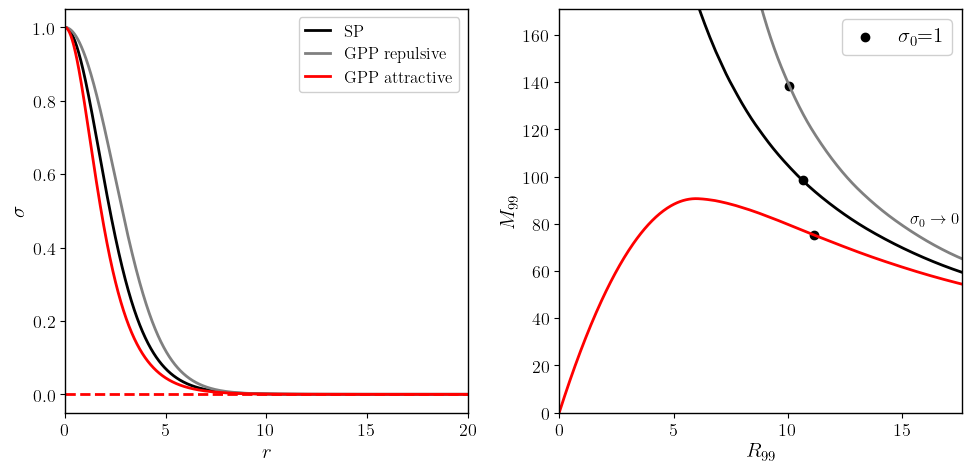

In [75]:

fig, axes = plt.subplots(nrows= 1, ncols = 2, figsize = (10,5) )

ax0 = axes[1]
ax1 = axes[0]

NRBstarML0n1   = interp1d(RL0n1, ML0n1, kind='quadratic')
NRRadioL0n1 = np.linspace(RL0n1[0],RL0n1[-1],1000)
ax0.plot(NRRadioL0n1,NRBstarML0n1(NRRadioL0n1), color = 'black')

NRBstarML1n1   = interp1d(RL1n1, ML1n1, kind='quadratic')
NRRadioL1n1 = np.linspace(RL1n1[0],RL1n1[-1],1000)
ax0.plot(NRRadioL1n1,NRBstarML1n1(NRRadioL1n1), color = 'gray')

#RL_1n1, ML_1n1
NRBstarML_1n1   = interp1d(RL_1n1, ML_1n1, kind='quadratic')
NRRadioL_1n1 = np.linspace(RL_1n1[0],RL_1n1[1],3000)
plt.plot(NRRadioL_1n1,NRBstarML_1n1(NRRadioL_1n1), color = 'red')

colores = ['black', 'gray', 'red']


met = 'DOP853' # 'RK45' # 'DOP853'
Rtol = 1e-13 
Atol = 1e-15
    
Nombres = ['SP','GPP repulsive','GPP attractive']
for i, dataPerf in enumerate(datos_):
    # Resolviendo
    en, Mas, rD, sD, dsD, uD, duD, FE, nodos, posNodos, LamV = metodos.profilesFromSolut(dataPerf, inf=False)
    
    ax1.plot(rD,sD,label=r'{}'.format(Nombres[i]), color = colores[i])
    ax1.annotate(r'$\sigma_{0}\to 0$', xy = (15,4*(np.pi)*1.61159143), xytext=(13.5, 4*(np.pi)*1.91159143),
            arrowprops={'arrowstyle': '->', 'ls': 'dashed'}, va = 'center')

    

ax0.set_xlim(0, 17.6 )
ax0.set_ylim(0, 171)
ax0.scatter(1.06346082e+01,4*np.pi*7.83593097e+00, color = 'black', label = r'$\sigma_0$=1')
ax0.scatter(1.00497823e+01, 4*np.pi*1.10101812e+01, color = 'black')
ax0.scatter(1.11229432e+01, 4*np.pi*5.99384772e+00, color = 'black')
plt.text(17.5, 80, r'$\sigma_{0}\to 0$', fontsize=12, ha='right')

#ax0.annotate(r'$\sigma_{0}\to 0$', xy = (1.61404233e+02, 4*np.pi*2.01641305e-05), xytext=(1.61404233e+02, 4*np.pi*2.01641305e-05), arrowprops={'arrowstyle': '->', 'ls': 'dashed'}, va = 'center')
ax1.set_xlim(0, 20)
ax1.set_xlabel(r'$r$')
ax1.set_ylabel(r'$\sigma$')
#ax1.set_title("Self-inteactive boson star $n=1$")
ax0.set_ylabel(r'$M_{99}$')
ax0.set_xlabel(r'$R_{99}$')
ax1.axhline(y=0, color='r', linestyle='--')
ax0.legend()
ax1.legend(fontsize = 12)
fig.tight_layout()
plt.savefig("boson_n1_M99R99r.pdf") 
plt.show()

### Total mass $M_{tot}$ vs $\sigma_{0}$

In [8]:
Lambda = [0]
datos = []
Umax = 30
Umin = 0.1
rmin = 0
rmax = 500 #1e03
met = 'DOP853' # 'RK45' # 'DOP853'
Rtol = 1e-13 
Atol = 1e-15

f0 = list(np.linspace(0.0001,30,70))

for j in Lambda: 

    for i in f0:
                print('Lambda', j, 'nodo', 0)

                U0, rTemp, posNodos = Freq_solveG2(i, Umax, Umin, j, rmax, rmin, 0,met=met,
                                      Rtol=Rtol, Atol=Atol)

                #datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
                datos.append([i, rTemp, j, 0, posNodos, met, Rtol, Atol, U0])
            
np.save('MvsSgma0.npy', datos, allow_pickle=True)
MvsSgma0 = np.load('MvsSgma0.npy', allow_pickle=True) 

Lambda 0 nodo 0


NameError: name 'Freq_solveG2' is not defined

In [44]:
MvsSgma0 = np.load('MvsSgma0.npy', allow_pickle=True) 

In [46]:
Massa = []
Sigma_0 = []
for dataPerf in MvsSgma0:
    # Resolviendo Numericamente
    en, Mas, rD, sD, dsD, uD, duD, EF, nodo, posnodos, LamV = metodos.profilesFromSolut(dataPerf, inf=False)
    #print(posnodos)
    if  sD[-1] == 1:
        continue
        
    if len(posnodos) == 0: 
        Sigma_0.append(sD[0])
        Massa.append(Mas)
        #plt.plot(rD,sD)


In [49]:
Massa

[3.234346125143957,
 5.1137738338089695,
 6.050659038514389,
 6.468413313169075,
 7.2318851461185965,
 7.584857200834309,
 8.245595838564348,
 8.556853786487622,
 8.8571802911545,
 9.147652086714464,
 10.227371248856812,
 10.726551851960311,
 11.203513137032832,
 11.43453552181677,
 11.883113841823592,
 12.101168975187889,
 13.137266477930005,
 13.334829076692982,
 13.721423340268732,
 13.910692091377117,
 14.643324022083476,
 14.996223871382018,
 15.16959545881441,
 15.678211452588032,
 16.008313662815933,
 16.33174510956854,
 16.491082265826783,
 17.113602141403398,
 17.26572541906331,
 17.416520037897257,
 18.151712045835094,
 18.719087428048912,
 18.99642140280143]

/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_6751/2308248317.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(Sigma_0, Massa)


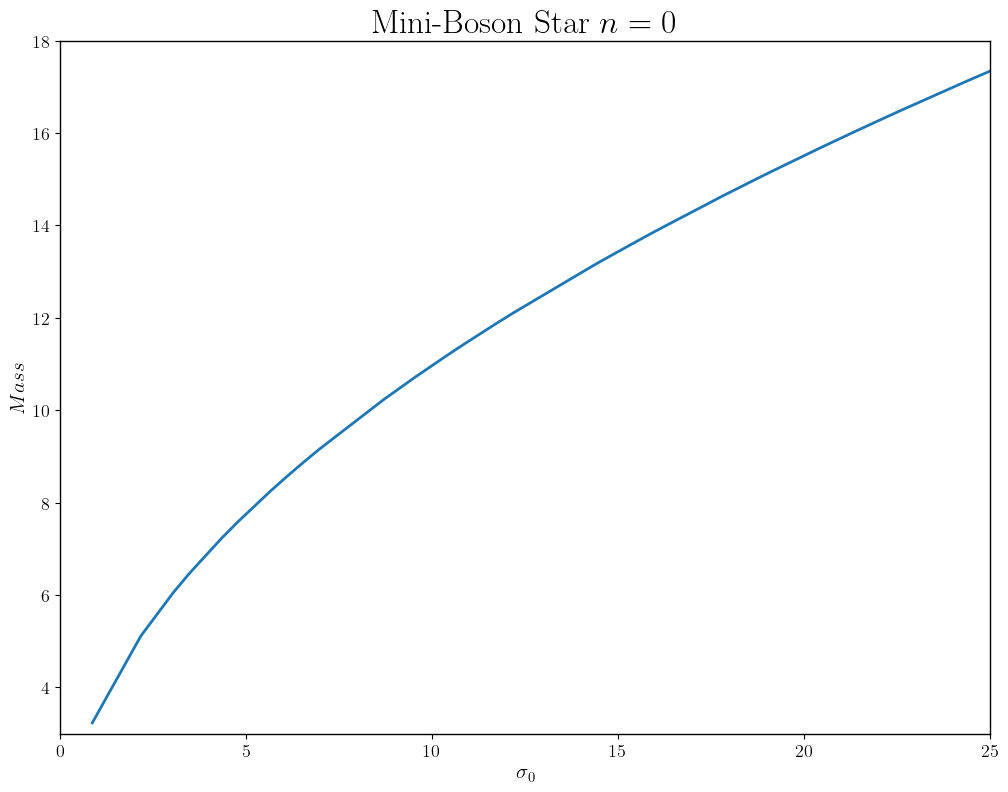

In [47]:
plt.plot(Sigma_0, Massa)
plt.ylim(3,18)
plt.xlim(0,25)
plt.title(r'Mini-Boson Star $n=0$')
plt.xlabel(r'$\sigma_0$')
plt.ylabel(r'$Mass$')
plt.savefig('MassVsSigma0.png')
plt.show()


### Non-relativistic Boson Star: Energy Functional $\lambda = 0,1.-1$

In [6]:
Lambda = [-1,0,1]
datos = []
Umax = 5; Umin = 0.0
rmin = 0; rmax = 30 #1e03
met ='RK45' # 'DOP853'
Rtol = 1e-8; Atol = 1e-9

F0 = []

f0 = list(np.linspace(0.0,1,10))

for j in Lambda: 

    for k,i in enumerate(f0):
                metodos.progressbar(k, len(f0)-1, 50, '■')
                print('n.',k,'Lambda', j, 'nodo', 0)

                U0, rTemp, posNodos = metodos.Freq_solveG2(i, Umax, Umin, j, rmax, rmin, 0, met=met,
                                      Rtol=Rtol, Atol=Atol)

                #datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
                datos.append([i, rTemp, j, 0, posNodos, met, Rtol, Atol, U0])
                F0.append(i)
                

                
f0 = list(np.linspace(1,3,10))
Umax = 6

for j in Lambda: 

    for k,i in enumerate(f0):
                print('n.',k,'Lambda', j, 'nodo', 0)

                U0, rTemp, posNodos = metodos.Freq_solveG2(i, Umax, Umin, j, rmax, rmin, 0, met=met,
                                      Rtol=Rtol, Atol=Atol)

                #datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
                datos.append([i, rTemp, j, 0, posNodos, met, Rtol, Atol, U0])
                F0.append(i)
                metodos.progressbar(k, len(f0)-1, 50, '■')
                
f0 = list(np.linspace(3,5,10))
Umax = 7


for j in Lambda: 

    for k,i in enumerate(f0):
                print('n.',k,'Lambda', j, 'nodo', 0)

                U0, rTemp, posNodos = metodos.Freq_solveG2(i, Umax, Umin, j, rmax, rmin, 0, met=met,
                                      Rtol=Rtol, Atol=Atol)

                #datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
                datos.append([i, rTemp, j, 0, posNodos, met, Rtol, Atol, U0])
                F0.append(i)
                metodos.progressbar(k, len(f0)-1, 50, '■')
            


n. 0 Lambda -1 nodo 0                                        ]0%
Maxima precisión alcanzada u0 1.7763568394002505e-14 radio 11.111110999999998
n. 1 Lambda -1 nodo 0                                        ]11%
Found 0.09673118591308594
n. 2 Lambda -1 nodo 0■                                       ]22%
Found 0.18335992470383644
n. 3 Lambda -1 nodo 0■■■■■■                                  ]33%
Found 0.2606850635493174
n. 4 Lambda -1 nodo 0■■■■■■■■■■■■                            ]44%
Found 0.32944894381216727
n. 5 Lambda -1 nodo 0■■■■■■■■■■■■■■■■■                       ]55%
Found 0.3903347493813669
n. 6 Lambda -1 nodo 0■■■■■■■■■■■■■■■■■■■■■■■                 ]66%
Maxima precisión alcanzada u0 0.4439681270405238 radio 29.207716401882127
n. 7 Lambda -1 nodo 0■■■■■■■■■■■■■■■■■■■■■■■■■■■■            ]77%
Maxima precisión alcanzada u0 0.4909193766154196 radio 28.3438838681721
n. 8 Lambda -1 nodo 0■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■      ]88%
Maxima precisión alcanzada u0 0.5317063610618966 radio 

KeyboardInterrupt: 

In [8]:
#np.save('EnerFunc.npy', datos, allow_pickle=True)
EnerFunc = np.load('EnerFunc.npy', allow_pickle=True) 

In [9]:
Energy_1 = []
NumberParticles_1 = []
Energy1 = []
NumberParticles1 = []
Energy0 = []
NumberParticles0 = []

for dataPerf in EnerFunc:
    
    # Resolviendo Numericamente
    en, Mas, rD, sD, dsD, uD, duD, EnF, nodo, posnodos, LamV = metodos.profilesFromSolut(dataPerf, inf=False)
    #print(posnodos)
    if  sD[-1] > 0.1:
        continue
        
    elif LamV == 0: 
        Energy0.append(EnF[-1])
        NumberParticles0.append(4*np.pi*Mas)
        
         
    elif LamV == -1: 
        Energy_1.append(EnF[-1])
        NumberParticles_1.append(4*np.pi*Mas)
        
         
    else: 
        Energy1.append(EnF[-1])
        NumberParticles1.append(4*np.pi*Mas)


In [63]:
for k,i in enumerate(NumberParticles_1): 
    print(k, Energy_1[k],i)

0 0.0 0.0
1 -0.22856368627936918 13.626910158394658
2 -0.5606279679324523 18.09218499448136
3 -0.8920014613050649 20.825045366013367
4 -1.1876845891261125 22.624176133006234
5 -1.4328968911134174 23.82467434797196
6 -1.6224102276121684 24.609776400283078
7 -1.7560246791565 25.093842782035036
8 -1.836238921679939 25.35403347576502
9 -1.866937990693078 25.44508723075893
10 -1.8669379906888381 25.445087229460125
11 -1.7979558053214573 25.270545440598788
12 -1.5855143773813016 24.78836277822011
13 -1.2625149595437741 24.12865932158481
14 -0.8562188716828946 23.372026584059583
15 -0.3882615232278605 22.5693790586587
16 0.12460204269720804 21.753124948822776
17 0.6695908619738113 20.943823450485493
18 1.2370530063814937 20.1543118544284
19 1.8197530048069275 19.392338258605452
20 1.8197530048049249 19.392338242984472
21 2.412300029439478 18.66227639102197
22 3.0107014522958826 17.96626062151757
23 3.6120197858189496 17.304946032049447
24 4.214111529807592 16.67802186599911
25 4.8154294575164

/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_2234/943802605.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.scatter(NumberParticles_1, Energy_1, label = '-1', marker='+')


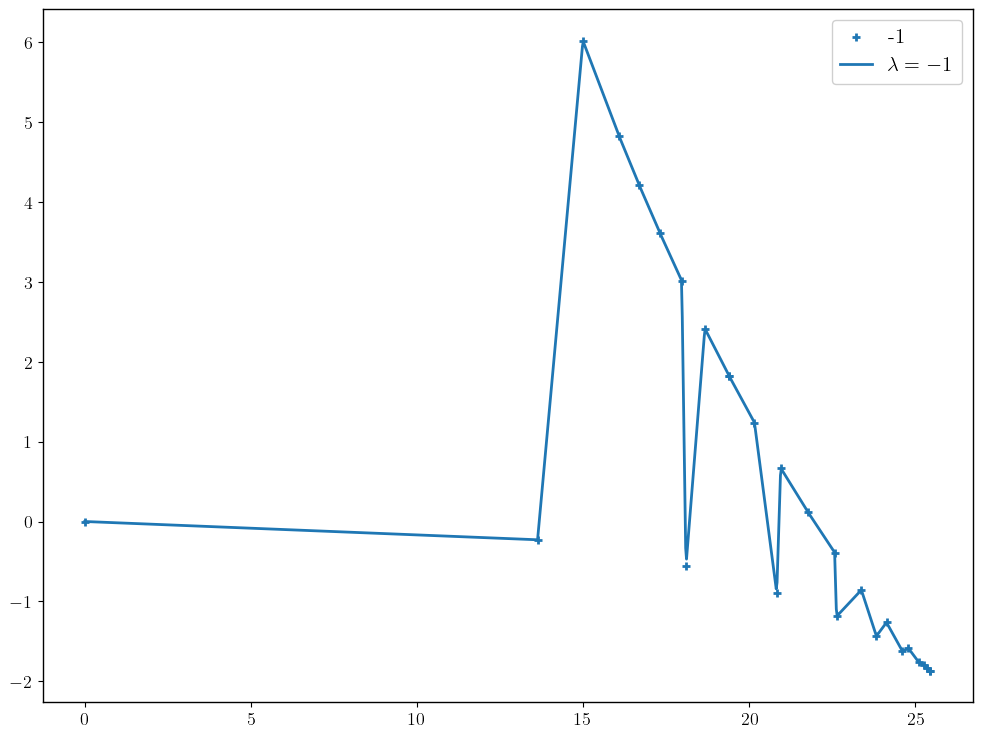

In [71]:
#plt.scatter(NumberParticles0, Energy0, label = '0')
#plt.scatter(NumberParticles1, Energy1, label = '1')

plt.scatter(NumberParticles_1, Energy_1, label = '-1', marker='+')

FEnergy_1   = interp1d(NumberParticles_1, Energy_1, kind='slinear')
N_1 = np.linspace(NumberParticles_1[0],NumberParticles_1[9],1000)
plt.plot(N_1, FEnergy_1(N_1), label = '$\lambda = -1$')


plt.legend()
plt.show()

/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_2234/358667831.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))


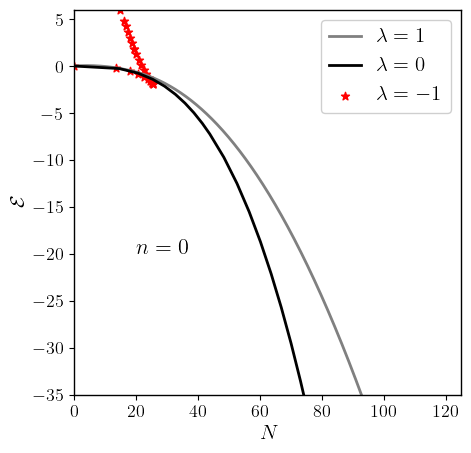

In [89]:
#Energy0.pop(0)
#NumberParticles0.pop(0)

fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (5,5))

#plt.plot(NumberParticles_1, Energy_1)

FEnergy1   = interp1d(NumberParticles1, Energy1, kind='quadratic')
N0 = np.linspace(NumberParticles1[0],NumberParticles1[-1],1000)
plt.plot(N0, FEnergy1(N0), label = '$\lambda = 1$', color = 'grey')

FEnergy0   = interp1d(NumberParticles0, Energy0, kind='linear')
N1 = np.linspace(NumberParticles0[0],NumberParticles0[-1],1000)
plt.plot(N1, FEnergy0(N1), label = '$\lambda = 0$', color = 'black')

#FEnergy_1   = interp1d(NumberParticles_1, Energy_1, kind='linear')
#N_1 = np.linspace(NumberParticles_1[0],NumberParticles_1[9],1000)
plt.scatter(NumberParticles_1, Energy_1, label = '$\lambda=-1$', marker='*', color = 'red')

plt.xlabel('$N$')
plt.ylabel('$\mathcal{E}$')
plt.text(20, -20, r'$n=0$')
plt.xlim(0,125)
plt.ylim(-35,6)
plt.legend()
plt.savefig('EnergyFunctional.pdf')
plt.show()


### Non-relativistic boson star. Energy functional vs Number of particles  $n=1$

In [23]:
Lambda = [-1]
datos = []
Umax = 5; Umin = 0.0
rmin = 0; rmax = 20 #1e03
met ='RK45' # 'DOP853'
Rtol = 1e-8; Atol = 1e-9
nodos = 1
F0 = []

f0 = list(np.linspace(0.0,1,10))

for j in Lambda: 

    for k,i in enumerate(f0):
                
                print('n.',k,'Lambda', j, 'nodo', 0)

                U0, rTemp, posNodos = metodos.Freq_solveG2(i, Umax, Umin, j, rmax, rmin, nodos, met=met,
                                      Rtol=Rtol, Atol=Atol)

                #datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
                datos.append([i, rTemp, j, 0, posNodos, met, Rtol, Atol, U0])
                F0.append(i)
                

                
f0 = list(np.linspace(1,4,10))
Umax = 5

for j in Lambda: 

    for k,i in enumerate(f0):
                print('n.',k,'Lambda', j, 'nodo', 0)

                U0, rTemp, posNodos = metodos.Freq_solveG2(i, Umax, Umin, j, rmax, rmin, nodos, met=met,
                                      Rtol=Rtol, Atol=Atol)

                #datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
                datos.append([i, rTemp, j, 0, posNodos, met, Rtol, Atol, U0])
                F0.append(i)
                
                
f0 = list(np.linspace(4,6,10))
Umax = 5


for j in Lambda: 

    for k,i in enumerate(f0):
                print('n.',k,'Lambda', j, 'nodo', 0)

                U0, rTemp, posNodos = metodos.Freq_solveG2(i, Umax, Umin, j, rmax, rmin, nodos, met=met,
                                      Rtol=Rtol, Atol=Atol)

                #datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
                datos.append([i, rTemp, j, 0, posNodos, met, Rtol, Atol, U0])
                F0.append(i)
            
                

f0 = list(np.linspace(6,10,20))
Umax = 5


for j in Lambda: 

    for k,i in enumerate(f0):
                print('n.',k,'Lambda', j, 'nodo', 0)

                U0, rTemp, posNodos = metodos.Freq_solveG2(i, Umax, Umin, j, rmax, rmin, nodos, met=met,
                                      Rtol=Rtol, Atol=Atol)

                #datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
                datos.append([i, rTemp, j, 0, posNodos, met, Rtol, Atol, U0])
                F0.append(i)
               
            

n. 0 Lambda -1 nodo 0
Maxima precisión alcanzada u0 1.7763568394002505e-14 radio 11.111110999999998
n. 1 Lambda -1 nodo 0
Found 0.13671875
n. 2 Lambda -1 nodo 0
Found 0.25390625
n. 3 Lambda -1 nodo 0
Found 0.3662109375
n. 4 Lambda -1 nodo 0
Found 0.472412109375
n. 5 Lambda -1 nodo 0
Found 0.572967529296875
n. 6 Lambda -1 nodo 0
Found 0.6671905517578125
n. 7 Lambda -1 nodo 0
Found 0.7557106018066406
n. 8 Lambda -1 nodo 0
Found 0.8389854431152344
n. 9 Lambda -1 nodo 0
Found 0.9174060821533203
n. 0 Lambda -1 nodo 0
Found 0.9174060821533203
n. 1 Lambda -1 nodo 0
Found 1.1269518733024597
n. 2 Lambda -1 nodo 0
Found 1.3040155824273825
n. 3 Lambda -1 nodo 0
Found 1.4549479252309538
n. 4 Lambda -1 nodo 0
Found 1.5846776679427421
n. 5 Lambda -1 nodo 0
Found 1.6970370358740183
n. 6 Lambda -1 nodo 0
Found 1.7950160816803873
n. 7 Lambda -1 nodo 0
Found 1.8809583517266049
n. 8 Lambda -1 nodo 0
Found 1.9567103054991364
n. 9 Lambda -1 nodo 0
Maxima precisión alcanzada u0 2.023735097285755 radio 19.44

In [24]:
np.save('EnerFunctionalV3.npy', datos, allow_pickle=True)
#EnerFuncn1 = np.load('EnerFunctionaln1.npy', allow_pickle=True) 

/Users/edgarpreciado/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [30]:
EnerFuncn1 = np.load('EnerFunctionalV3n1.npy', allow_pickle=True) 

In [26]:
Energy_1 = []
NumberParticles_1 = []


In [68]:
Energy1 = []
NumberParticles1 = []
Energy0 = []
NumberParticles0 = []

In [69]:


for dataPerf in EnerFuncn1:
    
    # Resolviendo Numericamente
    en, Mas, rD, sD, dsD, uD, duD, EnF, nodo, posnodos, LamV = metodos.profilesFromSolut(dataPerf, inf=True)
    #print(posnodos)
    if  sD[-1] > 0.1:
        continue
        
    elif LamV == 0: 
        Energy0.append(EnF[-1])
        NumberParticles0.append(4*np.pi*Mas)
        
         
    elif LamV == -1: 
        Energy_1.append(EnF[-1])
        NumberParticles_1.append(4*np.pi*Mas)
        
         
    else: 
        Energy1.append(EnF[-1])
        NumberParticles1.append(4*np.pi*Mas)


masa= 0.0

energía=  1.7763568394002505e-14 energíaInt=  1.7763568394002505e-14

Lambda -1

masa= 1.3679330415863988

energía=  0.029498362730573314 energíaInt=  -0.03889829043814655

Lambda -1

masa= 2.973897222472695

energía=  -0.014686967525728805 energíaInt=  -0.16338183180877652

Lambda -1

masa= 3.9645135754453658

energía=  -0.0727527315908593 energíaInt=  -0.27097841463102235

Lambda -1

masa= 4.624120270987136

energía=  -0.1329341259057508 energíaInt=  -0.3641401445952811

Lambda -1

masa= 4.960294873928503

energía=  -0.18837263825879003 energíaInt=  -0.43638738821775225

Lambda -1

masa= 5.274553052364056

energía=  -0.244215995620034 energíaInt=  -0.5079436550968222

Lambda -1

masa= 5.545098955424622

energía=  -0.2990833597870569 energíaInt=  -0.5763383149432755

Lambda -1

masa= 5.77489333729904

energía=  -0.35249927860474806 energíaInt=  -0.6412439528794653

Lambda -1

masa= 5.971169877564864

energía=  -0.40433855638725774 energíaInt=  -0.7028970581855023

Lambda -1

ValueError: need at least one array to concatenate

In [77]:
for k,i in enumerate(NumberParticles1): 
    print(k, i)

0 0.0
1 14.457595480285113
2 60.16325929380982
3 85.71216108331132
4 97.39442680770996
5 109.19335111132244
6 121.26607262370766
7 133.70976226505422
8 133.70976226505422
9 220.31562274247827
10 273.7070278593229


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_5046/915691560.py:12: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.scatter(NumberParticles1, Energy1, label = '1')


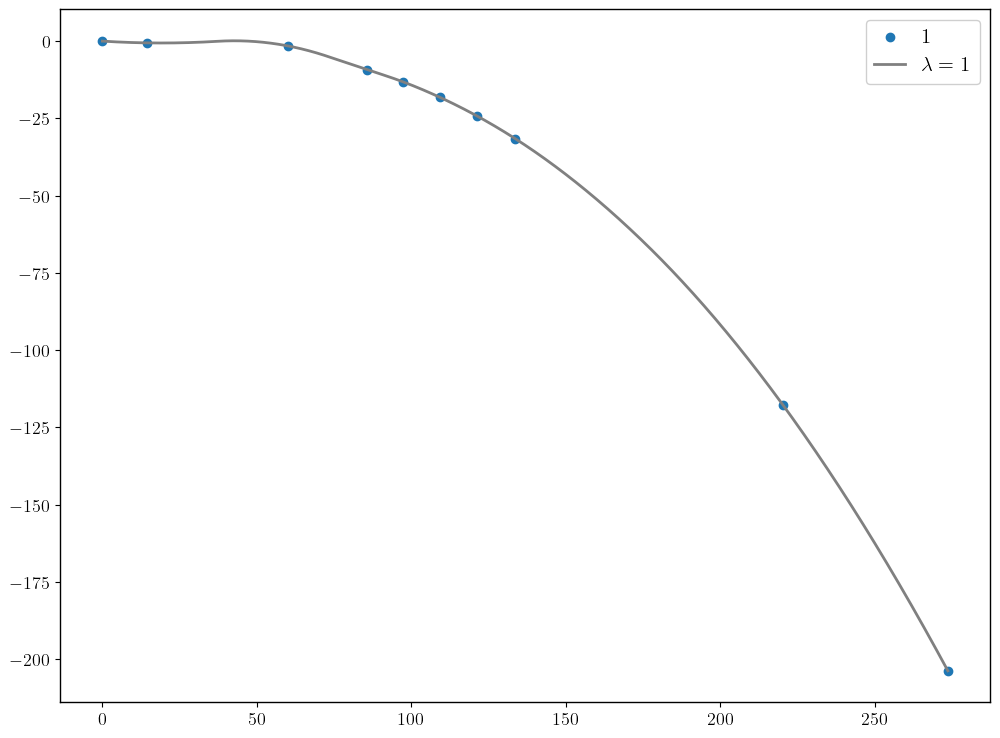

In [78]:
#NumberParticles0.pop(9)
#Energy0.pop(9)

NumberParticles1.pop(7)
Energy1.pop(7)

#NumberParticles_1.pop(2)
#Energy_1.pop(2)


#plt.scatter(NumberParticles0, Energy0, label = '0')
plt.scatter(NumberParticles1, Energy1, label = '1')

#plt.scatter(NumberParticles_1, Energy_1, label = '-1', marker='+')

#FEnergy0   = interp1d(NumberParticles0, Energy0, kind='quadratic')
#N0 = np.linspace(NumberParticles0[0],NumberParticles0[-1],3000)
#plt.plot(N0, FEnergy0(N0), label = '$\lambda = 0$', color = 'black')

FEnergy1   = interp1d(NumberParticles1, Energy1, kind='quadratic')
N1 = np.linspace(NumberParticles1[0],NumberParticles1[-1],1000)
plt.plot(N1, FEnergy1(N1), label = '$\lambda = 1$', color = 'grey')

#FEnergy_1   = interp1d(NumberParticles_1, Energy_1, kind='linear')
#N_1 = np.linspace(NumberParticles_1[59],NumberParticles_1[59],1000)
#plt.plot(N_1, FEnergy_1(N_1), label = '$\lambda=-1$', marker='*', color = 'red')


plt.legend()
plt.show()

/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_5046/3289123853.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (6,6))


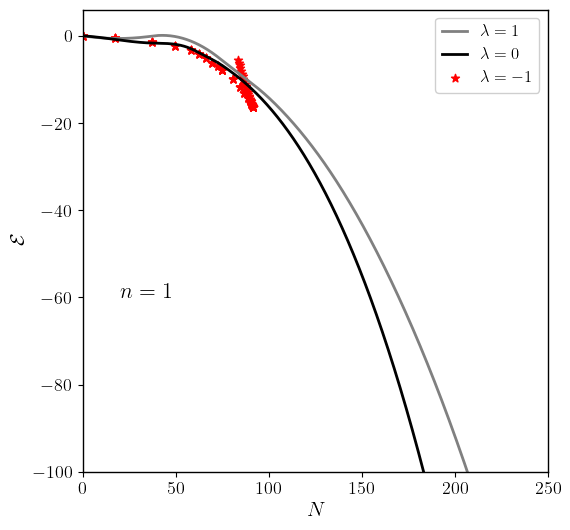

In [89]:
#Energy0.pop(0)
#NumberParticles0.pop(0)

fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize = (6,6))

#plt.plot(NumberParticles_1, Energy_1)

FEnergy1   = interp1d(NumberParticles1, Energy1, kind='quadratic')
N1 = np.linspace(NumberParticles1[0],NumberParticles1[-1],1000)
plt.plot(N1, FEnergy1(N1), label = '$\lambda = 1$', color = 'grey')

FEnergy0   = interp1d(NumberParticles0, Energy0, kind='cubic')
N0 = np.linspace(NumberParticles0[0],NumberParticles0[-1],3000)
plt.plot(N0, FEnergy0(N0), label = '$\lambda = 0$', color = 'black')

#FEnergy_1   = interp1d(NumberParticles_1, Energy_1, kind='linear')
#N_1 = np.linspace(NumberParticles_1[0],NumberParticles_1[9],1000)
plt.scatter(NumberParticles_1, Energy_1, label = '$\lambda=-1$', marker='*', color = 'red')

plt.xlabel('$N$')
plt.ylabel('$\mathcal{E}$')
plt.text(20, -60, r'$n=1$')
plt.xlim(0,125)
plt.xlim(0,250)
plt.ylim(-100,6)
plt.legend(fontsize = 12)
plt.savefig('EnergyFunctionaln1.pdf')
plt.show()


### Test

In [65]:
# Integrando
rtake = -160
rmin = 0
k = 0
radSigmMasa, Sig0R99M99EnergyT = [], []
for dataPerf in datosRadialLm1n1:
    # Resolviendo Numericamente
    en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = profilesFromSolut(dataPerf, inf=False)
    
    # Extendiendo
    Ext = (sD[0]*rD[-1])+70
    Np = int(Ext/2)
    rDnew, sDnew, dsDnew, uDnew, duDnew, datosEquiv = extend(rD[:rtake], sD[:rtake], dsD[:rtake], uD[:rtake], duD[:rtake],
                                                                Ext, Np, inf=False)
    
    # Interpolando perfil numerico
    sigmaPerf = interp1d(rDnew, sDnew)
    Intdensidad = lambda r: (r**2)*sigmaPerf(r)**2

    # Masa perfil
    MasaProf = []
    for i in rDnew:
        temp = quad(Intdensidad, rDnew[0], i)[0]
        MasaProf.append(temp)

    radSigmMasa.append([rDnew, sDnew, MasaProf])  # salvando r, sigma(r), M(r)

    # R99
    MTotal = MasaProf[-1]
    valM, indx = find_nearest(MasaProf, 0.99*MTotal)
    R99, M99 = rDnew[indx], MasaProf[indx]
    print(Mas, MTotal, M99)

    # E- valor
    #energyPro = lambda r: r*sigmaPerf(r)**2
    #temp = quad(energyPro, rDnew[0], rDnew[-1])[0]
    #Energy = uD[0] - temp   # energia barra
    #print(en, Energy)

    Sig0R99M99EnergyT.append([R99, M99])  # salvando sigma0, R99, M99, E
    print(k)
    k += 1

# Salvando
#np.save('radSigmMasan1Lm1.npy', np.array(radSigmMasa, dtype=object)) # save
np.save('Sig0R99M99Energyn1Lm1.npy', np.array(Sig0R99M99EnergyT, dtype=object)) # save

4.967300579424991e-06 2.016413220802306e-05 2.016413220802306e-05
0.0999997641033688 0.09999965712500924
0


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_4090/1489799560.py:23: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  temp = quad(Intdensidad, rDnew[0], i)[0]
/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_4090/1489799560.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp = quad(Intdensidad, rDnew[0], i)[0]


1.8430473833258012 2.97438297694743 2.9530634196061056
-0.027064500875405573 -0.04333696327093786
1


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_4090/1489799560.py:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp = quad(energyPro, rDnew[0], rDnew[-1])[0]


1.3112708203405876 1.311274666440378 1.2982039985337603
-0.13993522435972439 -0.13993539091026463
2
1.605784950233534 1.6057904626546933 1.5897370718519692
-0.20985388862583257 -0.20985413816277407
3


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_4090/1489799560.py:36: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  temp = quad(energyPro, rDnew[0], rDnew[-1])[0]


1.8540926213295843 1.854098526440684 1.8356543147361974
-0.2797725528470494 -0.27977284211646714
4
2.0728660330499666 2.072872796087131 2.0521610404529076
-0.34969121706412654 -0.3496916691788996
5
2.2706579955578468 2.2706660154250127 2.2478326063459844
-0.41960988139971855 -0.41961055656762836
6
2.4525500759001817 2.4525586531817236 2.428003643993482
-0.48952854557218795 -0.4895292347489748
7
2.6218535460436128 2.6218622018917315 2.5954693814273626
-0.5594472097942584 -0.5594478906387665
8
2.780868597990834 2.780878905409232 2.75309725748657
-0.629365874254208 -0.6293670527985616
9
2.9312700832794243 2.93128016284234 2.9020581726354924
-0.6992845382984344 -0.6992853905586457
10
3.0743224364496915 3.0743326028232176 3.043364531610082
-0.7692032025396778 -0.7692040220018672
11
3.2110080326939676 3.211020964291528 3.1791378372716608
-0.839121866007537 -0.8391231571135334
12
3.342108126237985 3.342120401341716 3.3086114734163306
-0.9090405310290223 -0.9090417558473137
13
3.46825617128367

In [86]:
Sig0R99M99EnergyT = np.load('Sig0R99M99Energyn1Lm1.npy', allow_pickle=True)

for j,i in enumerate(Sig0R99M99EnergyT): 
    print(j, i[0], i[1],  i[2])

0 0.0001 161.40423348338817 2.016413220802306e-05
1 0.07152142857142857 113.90591720864924 2.9530634196061056
2 0.14294285714285712 15.175868745944552 1.2982039985337603
3 0.21436428571428567 12.387946124584479 1.5897370718519692
4 0.28578571428571425 10.735562896278807 1.8356543147361974
5 0.35720714285714283 9.597213670935021 2.0521610404529076
6 0.42862857142857136 8.75420575050893 2.2478326063459844
7 0.50005 8.109398851981787 2.428003643993482
8 0.5714714285714285 7.5805767724175315 2.5954693814273626
9 0.642892857142857 7.153923045146019 2.75309725748657
10 0.7143142857142857 6.788688252414758 2.9020581726354924
11 0.7857357142857142 6.4643655483307985 3.043364531610082
12 0.8571571428571427 6.2003563515401625 3.1791378372716608
13 0.9285785714285714 5.949886742890026 3.3086114734163306
14 1.0 5.739321659841544 3.4337755676087323


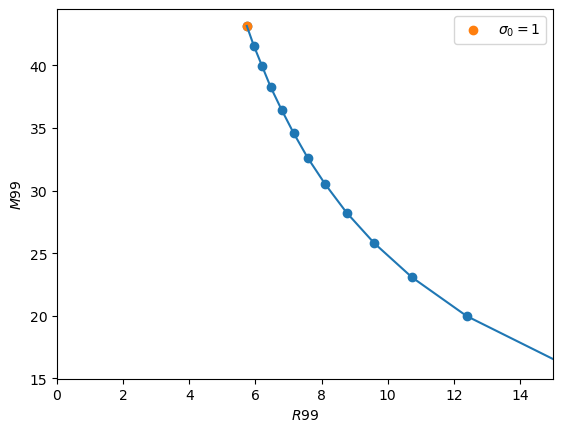

In [157]:
 # Sig0R99M99EnergyT.append([sDnew[0], R99, M99, Energy])
TodoJunto = Sig0R99M99EnergyT
# Itera sobre cada lista en la lista de listas
M99 = []
R99 = []


for i, sublista in enumerate(TodoJunto):
    
    if sublista[1] < 40:
        
                R99.append(sublista[1])
                M99.append(4*(np.pi)*sublista[2])
    else: 
        continue 
                    
       
# Imprime los resultados
#print("M99:", M99)
#print("R99:", R99)

#plt.scatter(x, y)
plt.xlim((0,15))
plt.plot(R99, M99)
plt.scatter(R99, M99)
plt.scatter( 5.739321659841544, 4*(np.pi)*3.4337755676087323, label = r'$\sigma_0=1$')
plt.ylabel(r'$M99$')
plt.xlabel(r'$R99$')
plt.legend()
plt.show()

In [123]:
Lambda = -1
datos = []
#f0 = list(np.linspace(0.0001,1,10))

for i in f0:
    
        U0, rTemp, posNodos = Freq_solveG2(i, Umax, Umin, Lambda, rmax, rmin, nodos,met=met,
                                  Rtol=Rtol, Atol=Atol)

            #datos.append([f0, rTemp, i, nodos, posNodos, met, Rtol, Atol, U0])
        datos.append([i, rTemp, Lambda, nodos, posNodos, met, Rtol, Atol, U0])
            
np.save('DatosM99vsRShootingL-1.npy', datos, allow_pickle=True)

Finding a profile with  0 nodes
Maxima precisión alcanzada u0 0.10000000000001741 radio 99.3459505317699
Finding a profile with  0 nodes
Maxima precisión alcanzada u0 0.10000000000001741 radio 15.492089240172765
Finding a profile with  0 nodes
Maxima precisión alcanzada u0 0.18341721902865976 radio 47.14360385400384
Finding a profile with  0 nodes
Maxima precisión alcanzada u0 0.2607288174118283 radio 38.97046458894561
Finding a profile with  0 nodes
Maxima precisión alcanzada u0 0.32948130056851954 radio 34.055056419717225
Finding a profile with  0 nodes
Maxima precisión alcanzada u0 0.3903576126084711 radio 31.560706330485985
Finding a profile with  0 nodes
Maxima precisión alcanzada u0 0.4439831870315497 radio 29.52011549414547
Finding a profile with  0 nodes
Maxima precisión alcanzada u0 0.49092813361717624 radio 27.61614301634442
Finding a profile with  0 nodes
Maxima precisión alcanzada u0 0.5317101472357941 radio 26.035894025056546
Finding a profile with  0 nodes
Maxima precisió

In [124]:
DatosM99vsRShootingLNegativo = np.load('DatosM99vsRShootingL-1.npy', allow_pickle=True)


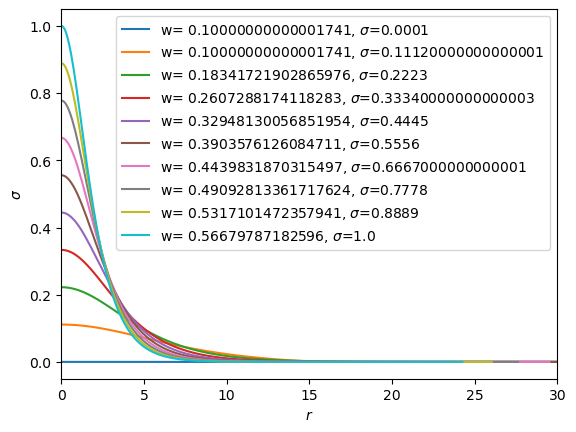

In [138]:
datos_filtro = []

arg = Lambda,

for j, i in enumerate(DatosM99vsRShootingLNegativo): 

                    U0 = [f0[j], 0, i[8], 0]
                    sol_ = solve_ivp(system, [rmin, i[1]], U0, args=(arg,), method=met,  rtol=Rtol, atol=Atol)

                    if sol_.y[0][-1] > 1: 
                        continue

                    else: 

                        datos_filtro.append(i)
                        plt.plot(sol_.t, sol_.y[0], label = r'w= {}, $\sigma$={}'.format(i[8], f0[j]))
                        plt.ylabel(r'$\sigma$')
                        plt.xlabel(r'$r$')
                        plt.xlim(0,30)
                        #print(j,i[0],f0[j])
plt.legend()
plt.show()
plt.savefig('Perfiles_varios')

In [141]:
Sig0R99M99EnergyTLNeg = M99vsR99(datos_filtro)

4.967300579424991e-06 2.016413220802306e-05 2.016413220802306e-05
0


/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_4090/210690749.py:25: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  temp = quad(Intdensidad, rDnew[0], i)[0]
/var/folders/1k/wc33r23j7pd72wpg_rynb4hr0000gn/T/ipykernel_4090/210690749.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp = quad(Intdensidad, rDnew[0], i)[0]


1.8430473833258012 2.97438297694743 2.9530634196061056
1
1.3112708203405876 1.311274666440378 1.2982039985337603
2
1.605784950233534 1.6057904626546933 1.5897370718519692
3
1.8540926213295843 1.854098526440684 1.8356543147361974
4
2.0728660330499666 2.072872796087131 2.0521610404529076
5
2.2706579955578468 2.2706660154250127 2.2478326063459844
6
2.4525500759001817 2.4525586531817236 2.428003643993482
7
2.6218535460436128 2.6218622018917315 2.5954693814273626
8
2.780868597990834 2.780878905409232 2.75309725748657
9
2.9312700832794243 2.93128016284234 2.9020581726354924
10
3.0743224364496915 3.0743326028232176 3.043364531610082
11
3.2110080326939676 3.211020964291528 3.1791378372716608
12
3.342108126237985 3.342120401341716 3.3086114734163306
13
3.468256171283678 3.468269138512335 3.4337755676087323
14


In [162]:
np.save('Sig0R99M99EnergyTLNeg.npy', Sig0R99M99EnergyTLNeg, allow_pickle=True)
Sig0R99M99EnergyTLNeg1 = np.load('Sig0R99M99EnergyTLNeg.npy', allow_pickle=True)

 # Sig0R99M99EnergyT.append([sDnew[0], R99, M99, Energy])
# Itera sobre cada lista en la lista de listas
R99LN = []
M99LN = []


for i, sublista in enumerate(Sig0R99M99EnergyTLNeg1):
    
    if sublista[1] < 40:
        
                M99LN.append(sublista[1])
                R99LN.append(4*(np.pi)*sublista[2])
    else: 
        continue 

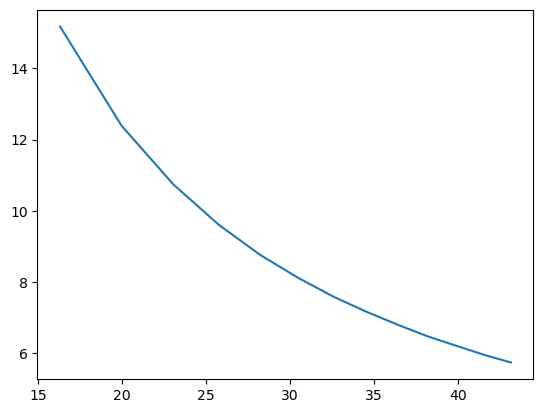

In [172]:
#plt.plot(R99,M99)
plt.plot(R99LN,M99LN)
plt.show()